# Chapter 1 : 탐색적 데이터 분석 (EDA)

## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats # for trimming
import weightedstats as ws # for weighted median
from statsmodels import robust
import matplotlib.pyplot as plt

%matplotlib inline

## 위치 추정
데이터가 주어졌을 때, 데이터를 살펴보는 가장 기초적인 단계는 각 피처(변수)의 '대표값(typical value)'를 구하는 것이다. 이는 곧 대부분의 값이 어디쯤에 위치하는지(중심경향성)을 나타내는 추정값이다.

In [6]:
data = pd.read_csv('data/state.csv')

# Example 1
print('Mean of Population without Trimming : ', data.loc[:,'Population'].mean())
print('Mean of Population After Trimming : ',stats.trim_mean(data.loc[:,'Population'], 0.1))
print('Median of Population : ', np.median(data.loc[:,'Population']))

print('Weighted Mean of Murder.Rate : ', np.average(data.loc[:,'Murder.Rate'], weights=data.loc[:,'Population']))
print('Weighted Median of Murder.Rate : ', ws.weighted_median(data.loc[:,'Murder.Rate'], weights=data.loc[:,'Population']))

Mean of Population without Trimming :  6162876.3
Mean of Population After Trimming :  4783697.125
Median of Population :  4436369.5
Weighted Mean of Murder.Rate :  4.445833981123393
Weighted Median of Murder.Rate :  4.4


평균은 가장 기본적인 위치 추정 방법이지만 극단값의 영향을 많이 받는다. 중간값(Median)이나 절사평균(Trimmed Mean)은 결과를 왜곡할 수도 있는 특잇값(Outlier, 극단값)들의 영향을 받지 않는 좀 더  Robust한 위치 추정 방법이다.

## 변이 추정
위치는 데이터의 특징을 요약하는 다양한 요소들 중 하나이다. 두 번째 요소인 변이(Variability)는 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도(Dispersion)를 나타낸다. 변이를 측정하고, 이를 줄이고, 실제 변이와 랜덤을 구분하고, 실제 변이의 다양한 요인들을 알아보고, 변이가 있는 상황에서 결정을 내리는 등, 통계의 핵심에 이 변이가 있다.

In [7]:
print('Standard deviation of Population is : ', data.loc[:,'Population'].std())
q75, q25 = np.percentile(data.loc[:,'Population'], [75,25])
iqr = q75 - q25
print('Interquartile range of Population is : ', iqr)
print('Median Absolute Deviation from Median (MAD) : ', robust.mad(data.loc[:,'Population']))

Standard deviation of Population is :  6848235.347401142
Interquartile range of Population is :  4847308.0
Median Absolute Deviation from Median (MAD) :  3849876.1459979336


표준편차는  MAD의 겅의 두 배가 된다. 표준편차는 특잇값에 민감하기 때문이다.

## 데이터 분포 탐색하기
지금까지 알아본 추정들은 모두 데이터의 위치 혹은 변이를 나타내기 위한 하나의 수치로 데이터를 요약하고 있다. 이와 더불어 데이터가 전반적으로 어떻게 분포하고 있는지를 알아보는 것 역시 유용하다.

In [13]:
q05, q25, q50, q75, q95 = np.percentile(data.loc[:,'Murder.Rate'], [5,25,50,75,95])
print('5%    25%    50%    75%    95%')
print('%.3f %.3f %.3f %.3f %.3f' % (q05, q25, q50, q75, q95))

5%    25%    50%    75%    95%
1.600 2.425 4.000 5.550 6.510


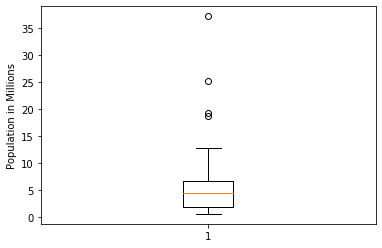

In [23]:
# Boxplot
plt.boxplot((data.loc[:,'Population'])/1000_000)
plt.ylabel('Population in Millions')
plt.show()

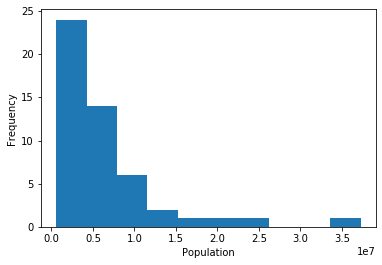

In [22]:
# Histogram
plt.hist(data.loc[:,'Population'])
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.07, 'Density Distribution')

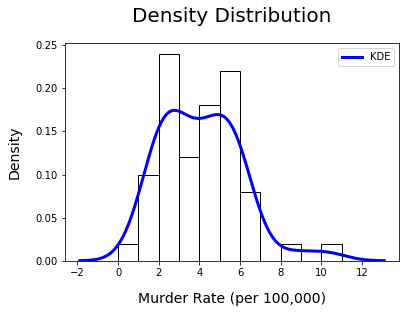

In [106]:
# Simple Density Plot
sns.distplot(data.loc[:,'Murder.Rate'], hist=True, kde=True, rug=False, 
             kde_kws={'linewidth': 3, 'color':'b', 'label': 'KDE'}, 
             hist_kws={'histtype':'bar', 'fill': False, 'linewidth': 1, 'alpha': 1, 'color': 'k', 'range': [0, 11]},
             bins=11)
# histytpe: step, stepfilled, bar
plt.xlabel('Murder Rate (per 100,000)', labelpad=14, fontsize=14)
plt.ylabel('Density', labelpad=14, fontsize=14)
plt.title('Density Distribution', fontsize=20, y=1.07)

## 이진 데이터와 범주 데이터 탐색하기

In [107]:
data2 = pd.read_csv('data/dfw_airline.csv')

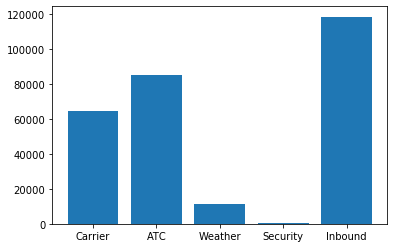

In [108]:
plt.bar(data2.columns, data2.iloc[0])
plt.show()

범주형 데이터는 간단한 비율이나 퍼센트를 이용해 데이터에 관해 이야기할 수 있다.

## 상관관계

In [110]:
data3 = pd.read_csv('data/sp500_px.csv')

In [111]:
data4 = data3[(data3['Unnamed: 0']) > '2012-07-01'][['T','CTL','FTR','VZ','LVLT']]

In [113]:
data4.corr(method='pearson')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [114]:
data4.corr(method='spearman')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.495345,0.324027,0.664985,0.289232
CTL,0.495345,1.000000,0.371543,0.423900,0.251322
FTR,0.324027,0.371543,1.000000,0.269324,0.267911
VZ,0.664985,0.423900,0.269324,1.000000,0.245456
LVLT,0.289232,0.251322,0.267911,0.245456,1.000000


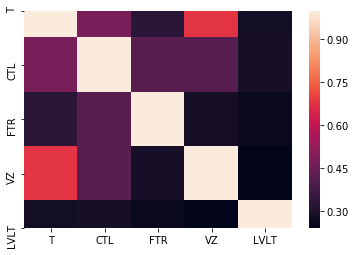

In [115]:
sns.heatmap(data4.corr())

### 산점도

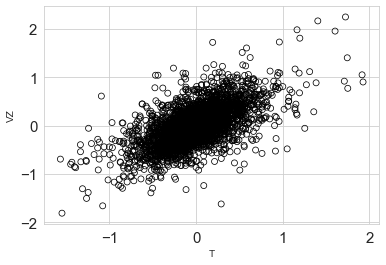

In [149]:
ax = sns.scatterplot(x='T', y='VZ', data=data3, marker='o', facecolors='none', edgecolor='k')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(True)

## 두 개 이상의 변수 탐색하기

### 수치형 변수 대 수치형 변수를 시각화

#### 육각형 구간과 등고선
산점도는 데이터의 개수가 상대적으로 적을 때는 괜찮다. 주가 이익 도표는 약 750개의 점으로 이루어졌다. 수십, 수백만의 레코드를 나타내기에는 산점도의 점둘이 너무 밀집되어 알아보기 어렵다. 육각형 구간 그림은 킹 카운티에 위치한 집들의 과세 평가액과 크기 사이의 관계를 나타낸다. 마치 먹구름처럼 보이기도 하는 이 그림은, 점으로 표시하는 대신 기록값들을 육각형 모양의 구간들로 나누고 각 구간에 포함된 기록값의 개수에 따라 색깔을 표시한다. 이 도포에서, 집의 크기와 과세 평가 금액이 양의 상관관계를 갖는 것을 쉽게 파악할 수 있다.

In [154]:
data5 = pd.read_csv('data/kc_tax.csv')
data6 = data5[(data5['SqFtTotLiving']>100) & (data5['SqFtTotLiving']<3500) & (data5['TaxAssessedValue']<750000)]

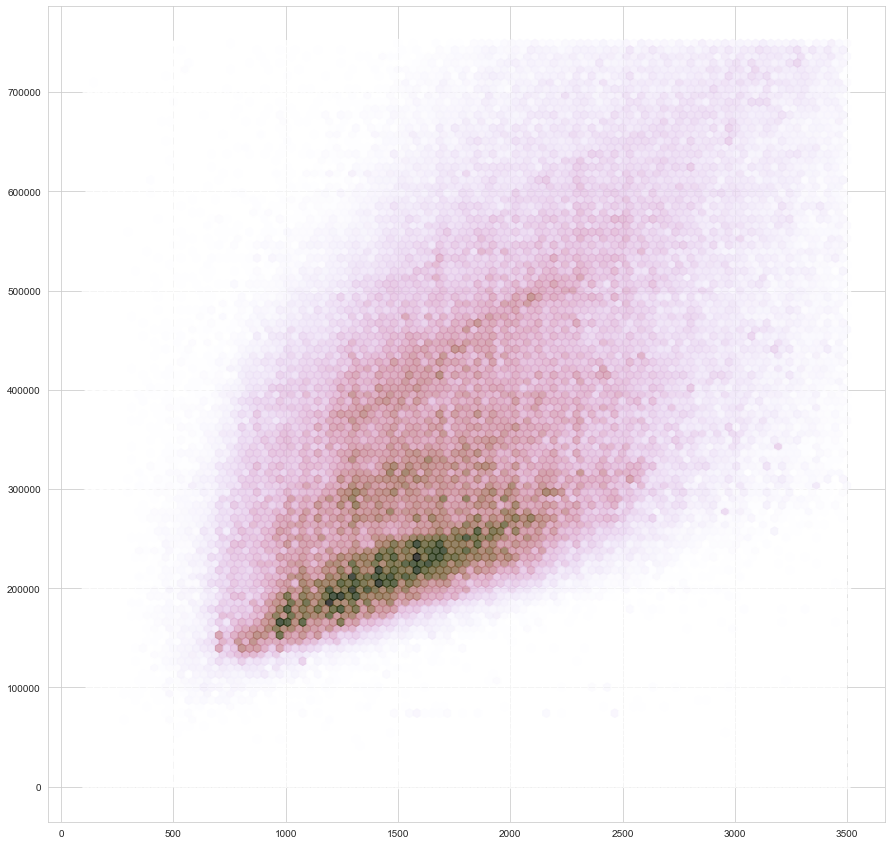

In [162]:
plt.figure(figsize=(15,15))
cmap = sns.cubehelix_palette(32, start=2, rot=-.65, dark=0.01, light=1, as_cmap=True)
plt.hexbin(data6['SqFtTotLiving'], data6['TaxAssessedValue'], cmap=cmap, alpha=0.75)
plt.show()

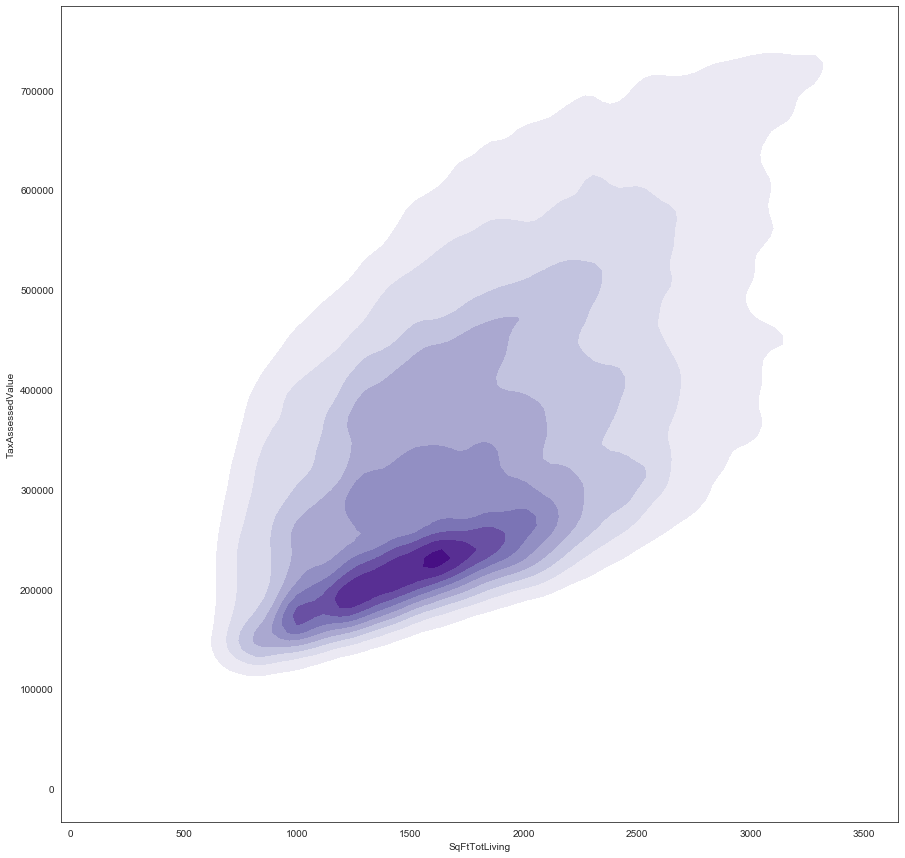

In [166]:
plt.figure(figsize=(15,15))
sns.kdeplot(data6['SqFtTotLiving'], data6['TaxAssessedValue'], shade=True, cmap="Purples", shade_lowest=False)
plt.show()

### 범주형 변수 대 수치형 변수

In [167]:
airline_stats = pd.read_csv('data/airline_stats.csv')
airline_stats.airline.value_counts()
airline_stats = airline_stats.fillna(0)

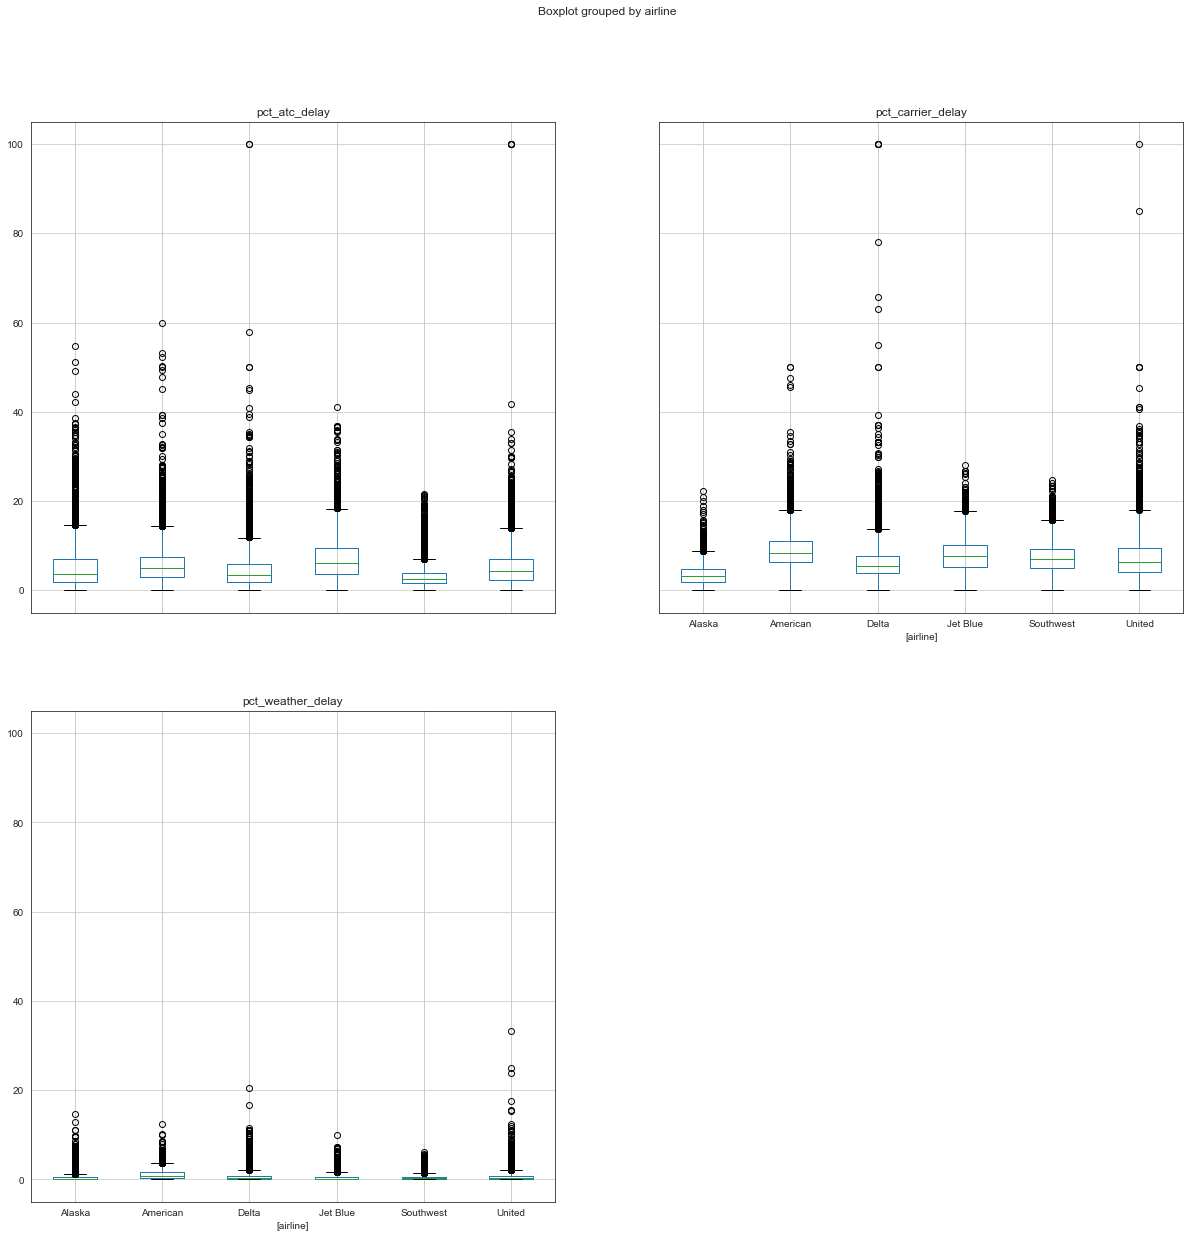

In [168]:
airline_stats.boxplot(by='airline', figsize=(20,20))
plt.show()

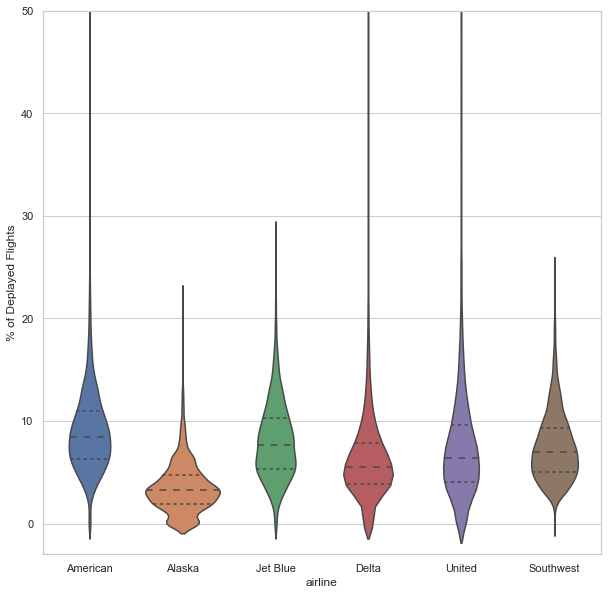

In [172]:
# 바이올린 도표
fig, ax = plt.subplots(figsize=(10,10))
sns.set(style='whitegrid')
sns.violinplot(x="airline", y="pct_carrier_delay", inner="quartile",data=airline_stats, ax=ax)
ax.set_ylim(-3,50)
ax.set_ylabel('% of Deplayed Flights')
plt.show()

### 다변수 시각화하기

In [177]:
# subset data for graph
data6_1 = data6[data6['ZipCode'].isin([98105, 98108, 98126, 98188])]

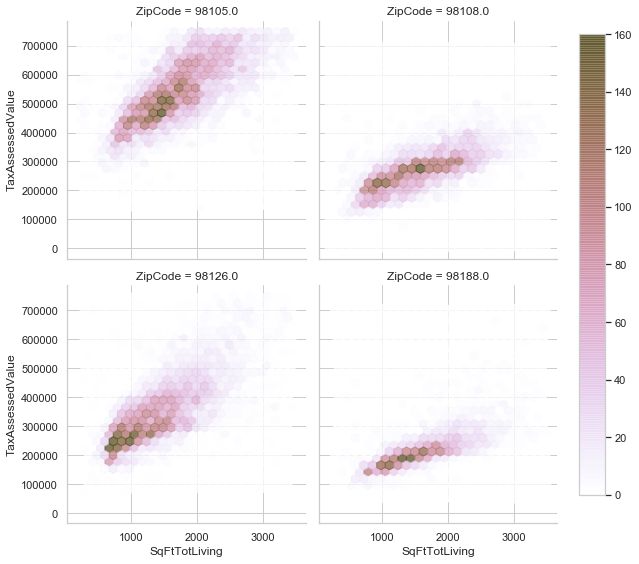

In [176]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.cubehelix_palette(32, start=2, rot=-.65, dark=0.3, light=1,as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(data6_1, hue="ZipCode", col="ZipCode", col_wrap=2, height=4)
g.map(hexbin, "SqFtTotLiving", "TaxAssessedValue", alpha=0.75)
cbar_ax = g.fig.add_axes([1.015, 0.13, 0.045, 0.8])
plt.colorbar(cax=cbar_ax)
plt.show()